In [1]:
from EMDA import EMDA, __version__
print("EMDA version is:", __version__)

from numpy import average

import matplotlib.pyplot as plt


plt.style.use('ggplot')

EMDA version is: 1.0.0a4


# Load parameters and trajectory <a class="anchor" id="load"></a>

In [2]:
parameters = 'parameters.prmtop' # AMBER parameters file
trajectory = 'trajectory.nc'     # AMBER NetCDF coordinates (10 frames)

In [3]:
emda = EMDA(parameters=parameters, trajectory=trajectory)

Trajectory has been loaded!


In [4]:
#emda.load_variant(parameters, trajectory)

In [5]:
emda.load_trajectory(trajectory)
#emda.load_trajectory(trajectory, variant_name='V1')
#emda.load_trajectory(trajectory)
#emda.load_trajectory(trajectory)



A new replica has been loaded to variant V1!


In [6]:
emda.universe

{'V1': {'R1': <Universe with 79250 atoms>, 'R2': <Universe with 79250 atoms>}}

# Select the atoms to be used for the analysis <a class="anchor" id="select"></a>

In [7]:
emda.select('C10', 'C10', sel_type='at_name',)
emda.select('C11', 'C11', sel_type='at_name',)
emda.select('C12', 'C12', sel_type='at_name',)
emda.select('C13', 'C13', sel_type='at_name')
emda.select('C14', 'C14', sel_type='at_name',)
emda.select('H12', ['H12A', 'H12B'], sel_type='at_name')
emda.select('cof', 10597, sel_type='at_num')

emda.select('COO', [10599, 10600, 10601], sel_type='at_num')

#subs = emda.universe.select_atoms('resid 666')
emda.select('subs', 666, sel_type='res_num')

print(emda.selections)

{'C10': 'name C10', 'C11': 'name C11', 'C12': 'name C12', 'C13': 'name C13', 'C14': 'name C14', 'H12': 'name H12A or name H12B', 'cof': 'bynum 10597', 'COO': 'bynum 10599 or bynum 10600 or bynum 10601', 'subs': 'resid 666'}


# Analysis of the trajectory <a class="anchor" id="trajanalysis"></a>

In [8]:
emda.add_distance('dist_H12', 'cof', 'H12')
emda.add_angle('angle_C11C12C13', 'C11', 'C12', 'C13')
emda.add_dihedral('dihe_C10C11C13C14', 'C10', 'C11', 'C13', 'C14', domain=180)
#emda.add_contacts('contacts_COO', 'COO', sel_env=5, interactions='all', include_WAT=True, measure_distances=True)
#emda.add_protein_contacts('contacts_prot', sel_env=3, measure_distances=True)
#emda.add_pKa('pka', excluded_ions=['Na+'], keep_pdb=True, keep_pka=True)
#emda.add_RMSD('RMSD_subs', 'subs', weights='mass')

## Run the measurements

In [9]:
print(emda.measures)

{'dist_H12': Measure dataclass with:
	Name:   dist_H12
	Type:   distance
	Sel:    ['cof', 'H12']
	Status: 
		V1, R1: Not calculated
		V1, R2: Not calculated
, 'angle_C11C12C13': Measure dataclass with:
	Name:   angle_C11C12C13
	Type:   angle
	Sel:    ['C11', 'C12', 'C13']
	Status: 
		V1, R1: Not calculated
		V1, R2: Not calculated
, 'dihe_C10C11C13C14': Measure dataclass with:
	Name:   dihe_C10C11C13C14
	Type:   dihedral
	Sel:    ['C10', 'C11', 'C13', 'C14']
	Status: 
		V1, R1: Not calculated
		V1, R2: Not calculated
}


In [10]:
emda.run(sleep_time=0)

single variant, multireplica


Replica:   0%|          | 0/2 [00:00<?, ?rep/s]

Measuring variant V1, replica R1:   0%|          | 0/10 [00:00<?, ?Frame/s]

Measuring variant V1, replica R2:   0%|          | 0/10 [00:00<?, ?Frame/s]

emda.measures['dist_H12'].result

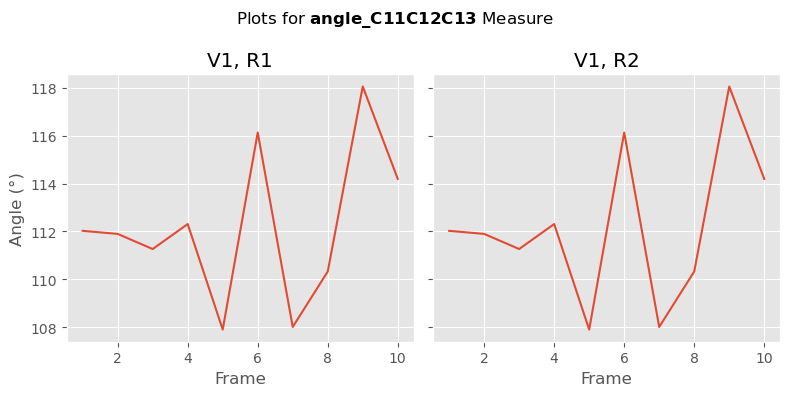

In [11]:
emda.plot_measure(measure_name='angle_C11C12C13', combine_replicas=False, width_per_replica=4)

## Analyse distances, angles and dihedrals

In [12]:
emda.analyse_value('dist_H12_bool', 'dist_H12', 5)
emda.analyse_value('dihe_C10C11C13C14_bool', 'dihe_C10C11C13C14', 0, 20, mode='tol')

In [13]:
emda.analyses['dist_H12_bool']

Analysis dataclass with:
	Name:   dist_H12_bool
	Type:   value
	Related mesure:    dist_H12

In [14]:
emda.analyses['dihe_C10C11C13C14_bool'].result

{'V1': {'R1': [True, True, True, True, True, True, False, True, True, True],
  'R2': [True, True, True, True, True, True, False, True, True, True]}}

print('angle_C11C12C13 average is:', average(emda.measures['angle_C11C12C13'].result))
print('angle_C11C12C13 min is:', min(emda.measures['angle_C11C12C13'].result))
print('angle_C11C12C13 max is:', max(emda.measures['angle_C11C12C13'].result))

emda.analyse_value('angle_C11C12C13_bool', 'angle_C11C12C13', 110, 5, mode='tol')

emda.analyses

In [15]:
emda.analyse_NACs('dist_dihe_NACs', ['dist_H12_bool', 'dihe_C10C11C13C14_bool'], invert=False)


In [16]:
emda.analyses['dist_dihe_NACs'].result

{'V1': {'R1': [True, True, True, True, True, True, False, False, False, False],
  'R2': [True, True, True, True, True, True, False, False, False, False]}}

emda.analyses['dist_dihe_NACs'].result = {'V1': {'R1': [True, True, True, True, True, True, False, False, False, False],
  'R2': [False, False, False, False, True, False, False, False, False, False]},
 'V2': {'R1': [False, True, True, True, True, True, False, False, False, False],
  'R2': [True, False, True, False, True, False, False, False, True, False],
  'R3': [False, False, True, False, True, False, False, False, True, False]}}

In [17]:
?emda.plot_NACs

Signature:
emda.plot_NACs(
    analysis_name,
    merge_replicas=False,
    percentage=False,
    error_bar=True,
    bar_width=0.1,
    width=None,
    title=None,
    out_name=False,
)
Docstring:
DESCRIPTION:
    Function for plotting NACs (or value-type Analysis) as a bar plot where all the variants are compared
File:      ~/miniconda3/envs/emda-dev/lib/python3.12/site-packages/EMDA/plotters.py
Type:      method

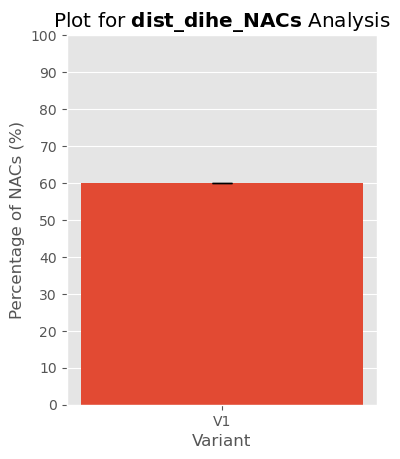

In [24]:
emda.plot_NACs('dist_dihe_NACs', merge_replicas=True, percentage=True, bar_width=0.1, width=4)

{'R1': [6], 'R2': [6]}


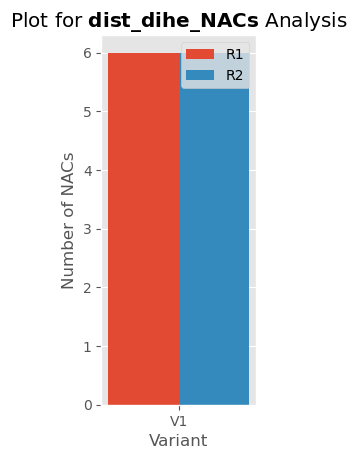

In [22]:
emda.plot_NACs('dist_dihe_NACs', merge_replicas=False, percentage=False, bar_width=0.2)

print('dist_H12_bool:\t\t\t', emda.analyses['dist_H12_bool'].result)
print('angle_C11C12C13_bool:\t\t', emda.analyses['angle_C11C12C13_bool'].result)
print('dist_angle_NACs:\t\t', emda.analyses['dist_angle_NACs'].result)

## Analyse contacts

emda.analyse_contacts_frequency('contacts_COO_freq', 'contacts_COO')

emda.analyses['contacts_COO_freq'].result['V1']['R2']

In [19]:
#emda.analyse_contacts_frequency('contacts_prot_freq', 'contacts_prot', percentage=True, normalise_to_most_frequent=True)
emda.analyse_contacts_amount('contacts_prot_amount', 'contacts_prot')

emda.analyses['contacts_prot_amount'].result['V1']['R1']

KeyError: 'contacts_prot'

In [ ]:
#emda.analyse_contacts_frequency('contacts_COO_freq', 'contacts_COO', percentage=True, normalise_to_most_frequent=True)
emda.analyse_contacts_amount('contacts_COO_amount', 'contacts_COO')

emda.analyses['contacts_COO_amount'].result['V1']['R1']

[19, 17, 19, 15, 15, 17, 19, 14, 15, 16]